<a href="https://colab.research.google.com/github/phudo0605/AI/blob/main/HW2/water_jug_puzzle1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

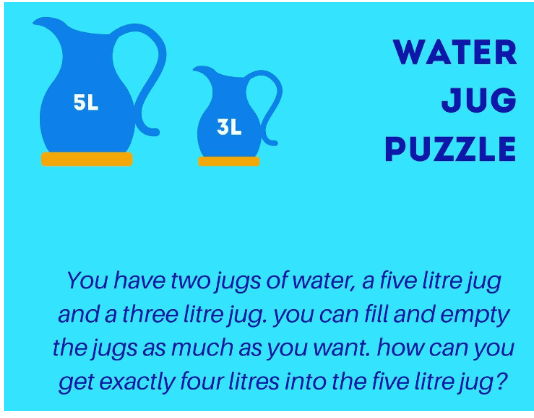
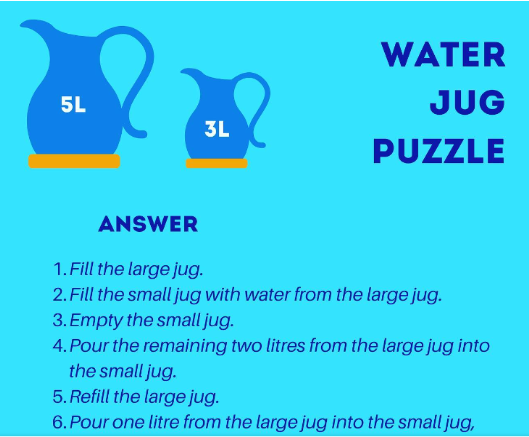

# **[5L_jug, *3L_jug*]**

**Start State**
[0,0]

**Goal State**
[4,d]
d: don't care

**Rules**
R1: Fill up a jug with water from outside;
R2: Empty a jug;
R3: Pour water from one jug to another jug

**The Solution**
[0,0] -->R1-->[5,0] -->R3 -->[2,3] -->R2 -->[2,0] -->R3 -->[0,2] -->R1 -->[5,2] -->R3 -->[4,3]



In [4]:
class WaterJugPuzzle():

    # We model the state using a list of 2 jugs in order [5L_jug , 3L_jug]
    # The current volume of water in 5L_jug = self.state[0] ; in 3L_jug = self.state[1]

    def __init__(self):
        self.state  = [0, 0]

    def is_jug_overfull(self):
            if self.state[0] > 5 or self.state[1] > 3:
                return True

    def state_ok(self):
        return not (self.is_jug_overfull())

    def save_state(self):
        self._state  = self.state

    def undo_state(self):
        self.state  = self._state


    ####################################################################
    # Rule 1: Fill up 5L_jug.
    ####################################################################
    def R1_fill_up(self):

        self.save_state()

        if self.state[0] == 0 :
           self.state[0] += 5
           if not self.state_ok(): self.undo_state()


    ####################################################################
    # Rule 2: Empty 3L_jug
    ####################################################################
    def R2_empty_jug(self):

        self.save_state()

        if self.state[1] == 3:
            self.state[1] -= 3
            if not self.state_ok(): self.undo_state()


    ####################################################################
    # Rule 3: Pour water from 5L_jug to 3L_jug
    ####################################################################
    def R3_pour_jug2jug(self):

        self.save_state()

        if self.state[0] == 5:
           if self.state[1] == 0:
              self.state[0] -= 3
              self.state[1] += 3
           if self.state[1] == 2:
              self.state[0] -= 1
              self.state[1] += 1
           if not self.state_ok(): self.undo_state()

        elif self.state[0] == 2 and self.state[1] == 0:
           self.state[0] -= 2
           self.state[1] += 2
           if not self.state_ok(): self.undo_state()

    #########################################################################
    # Set one invariant to ensure the state of the system is consistent
    #########################################################################
    def jug_not_full(self):
        return not self.is_jug_overfull()

    ####################################################################
    # Display states
    ####################################################################
    def print_state(self):
        print("===> ({s})".format(s=self.state))


In [6]:
# Forming the Solution

wjp = WaterJugPuzzle()

# print the initial state
wjp.print_state()


print("-----------------------")
# apply a rule and print the resulting state
wjp.R1_fill_up()
wjp.print_state()

print("-----------------------")
wjp.R3_pour_jug2jug()
wjp.print_state()

print("-----------------------")
wjp.R2_empty_jug()
wjp.print_state()

print("-----------------------")
wjp.R3_pour_jug2jug()
wjp.print_state()

print("-----------------------")
wjp.R1_fill_up()
wjp.print_state()

print("-----------------------")
wjp.R3_pour_jug2jug()
wjp.print_state()




===> ([0, 0])
-----------------------
===> ([5, 0])
-----------------------
===> ([2, 3])
-----------------------
===> ([2, 0])
-----------------------
===> ([0, 2])
-----------------------
===> ([5, 2])
-----------------------
===> ([4, 3])
